### Data Extraction

In [1]:
import pandas as pd

#original_data = pd.read_csv('core_poi-patterns_baseline.csv')
#original_data = pd.read_csv('core_poi-patterns_hurricane.csv')
original_data = pd.read_csv('core_poi-patterns_extension.csv')

data_1 = original_data[original_data['city'].isin(['Panama City','Panama City Beach'])]
data_2 = original_data[original_data['city'].isin(['Pensacola'])]
data_3 = original_data[original_data['city'].isin(['Tallahassee'])]

data_1 = data_1[['placekey','naics_code','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day','distance_from_home','visitor_home_aggregation']]
data_2 = data_2[['placekey','naics_code','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day','distance_from_home','visitor_home_aggregation']]
data_3 = data_3[['placekey','naics_code','postal_code','date_range_start','date_range_end','raw_visit_counts','raw_visitor_counts','visits_by_day','distance_from_home','visitor_home_aggregation']]

#data_1.to_excel('Panama_baseline.xlsx',index=False)
#data_2.to_excel('Pensacola_baseline.xlsx',index=False)
#data_3.to_excel('Tallahassee_baseline.xlsx',index=False)

#data_1.to_excel('Panama_hurricane.xlsx',index=False)
#data_2.to_excel('Pensacola_hurricane.xlsx',index=False)
#data_3.to_excel('Tallahassee_hurricane.xlsx',index=False)

data_1.to_excel('Panama_extension.xlsx',index=False)
data_2.to_excel('Pensacola_extension.xlsx',index=False)
data_3.to_excel('Tallahassee_extension.xlsx',index=False)

### Data Exploration

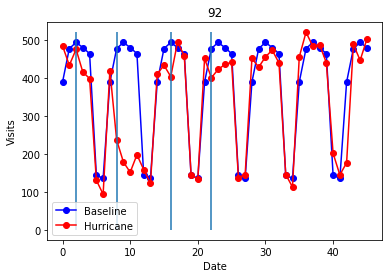

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cities: Panama, Pensacola, Tallahassee
city = 'Tallahassee'
data_baseline = pd.read_excel(city + '_baseline.xlsx','Sheet1')
data_hurricane = pd.read_excel(city + '_hurricane.xlsx','Sheet1')
data_extension = pd.read_excel(city + '_extension.xlsx','Sheet1')
data_baseline = data_baseline[['category','visits_by_day']]
data_hurricane = data_hurricane[['category','visits_by_day']]
data_extension = data_extension[['category','visits_by_day']]

#Change category
category = [92]

#Visits for baseline
df_b = data_baseline[data_baseline['category'].isin(category)].reset_index()
visits_sum, visits_b = [0] * 30, [0] * 31
for i in range(len(df_b)):
    visits_sum = np.sum([visits_sum, eval(df_b['visits_by_day'][i])], axis=0)
for i in range(7):
    for j in range(4):
        visits_b[i+7*j] = np.mean([visits_sum[2+i], visits_sum[9+i], visits_sum[16+i], visits_sum[23+i]])
visits_b[28:46] = visits_b[0:18]

#Visits for hurricane
df_h = data_hurricane[data_hurricane['category'].isin(category)].reset_index()
df_e = data_extension[data_extension['category'].isin(category)].reset_index()
visits_h, visits_e = [0] * 31, [0] * 30
for i in range(len(df_h)):
    visits_h = np.sum([visits_h, eval(df_h['visits_by_day'][i])], axis=0)
for i in range(len(df_e)):
    visits_e = np.sum([visits_e, eval(df_e['visits_by_day'][i])], axis=0)

visits_h = list(visits_h)
visits_e = list(visits_e[0:15])
visits_h += visits_e

#Visualization
plt.plot(range(46), visits_b, 'o-', label = 'Baseline', color = 'b')
plt.plot(range(46), visits_h, 'o-', label = 'Hurricane', color = 'r')

plt.vlines(2, 0, max(visits_h))
plt.vlines(8, 0, max(visits_h))
plt.vlines(16, 0, max(visits_h))
plt.vlines(22, 0, max(visits_h))

plt.xlabel('Date')
plt.ylabel('Visits')
plt.title(str(category[0]))
plt.legend()
plt.savefig(str(category[0])+'.png')
plt.show()

In [1]:
import pandas as pd

data = pd.read_excel('Tallahassee_hurricane.xlsx','Sheet1')
data = data[['category','pattern']]
data['count'] = 1

data1 = data[data['pattern']==1]
data2 = data[data['pattern']==2]
data3 = data[data['pattern']==3]
data4 = data[data['pattern']==4]

data1 = data1.groupby('category').agg({'count':'count'}).reset_index()
data2 = data2.groupby('category').agg({'count':'count'}).reset_index()
data3 = data3.groupby('category').agg({'count':'count'}).reset_index()
data4 = data4.groupby('category').agg({'count':'count'}).reset_index()

data = pd.concat([data1,data2,data3,data4], axis=1)
data.to_excel('Tallahassee_category.xlsx',index=False)